<a href="https://colab.research.google.com/github/nedlecky/Colabs/blob/main/Thermocouple_Linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Test
import numpy as np
x = np.array([0,300,500,1000,1500,1700,2000,2500,3000,3300,3500,4000,4500,5000,5300,5500,5900,6000], dtype='f')
y = np.array([32.0,122.4,176.0,296.4,405.7,447.6,509.0,608.4,704.7,761.4,799.0,891.9,983.0,1072.6,1125.7,1160.8,1230.3,1247.5])

In [ ]:
print(x.reshape(18,1).shape)
print(y.shape)

(18, 1)
(18,)


In [ ]:
x.resize(18,1)
print(x)
print(x.T)

[[0]
 [300]
 [500]
 [1000]
 [1500]
 [1700]
 [2000]
 [2500]
 [3000]
 [3300]
 [3500]
 [4000]
 [4500]
 [5000]
 [5300]
 [5500]
 [5900]
 [6000]]
[[0 300 500 1000 1500 1700 2000 2500 3000 3300 3500 4000 4500 5000 5300
  5500 5900 6000]]


In [ ]:
y.resize(18,1)
print(y)


[[32]
 [122]
 [176]
 [296]
 [406]
 [448]
 [509]
 [608]
 [705]
 [761]
 [799]
 [892]
 [983]
 [1073]
 [1126]
 [1161]
 [1230]
 [1248]]


In [ ]:
data = np.hstack([x,y])

In [ ]:
data

array([[0, 32],
       [300, 122],
       [500, 176],
       [1000, 296],
       [1500, 406],
       [1700, 448],
       [2000, 509],
       [2500, 608],
       [3000, 705],
       [3300, 761],
       [3500, 799],
       [4000, 892],
       [4500, 983],
       [5000, 1073],
       [5300, 1126],
       [5500, 1161],
       [5900, 1230],
       [6000, 1248]])

In [ ]:
import pandas as pd
df = pd.DataFrame(data, columns=['emf', 'Temp'])

In [ ]:
df

,emf,Temp
0,0.0,32.0
1,300.0,122.4
2,500.0,176.0
3,1000.0,296.4
4,1500.0,405.7
5,1700.0,447.6
6,2000.0,509.0
7,2500.0,608.4
8,3000.0,704.7
9,3300.0,761.4


In [ ]:
df.shape


(18, 2)

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
df.to_csv('/content/gdrive/My Drive/thermocouple.csv')

In [ ]:
df2 = pd.read_csv('/content/gdrive/My Drive/thermocouple.csv',index_col=0)
df2.shape


(18, 2)

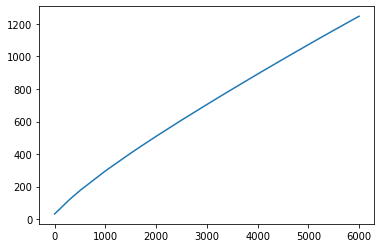

In [ ]:
import matplotlib.pyplot as plt

plt.plot(x,y)


Coefficients: 
 [[0]]
Mean squared error: 526.05
Coefficient of determination: 1.00


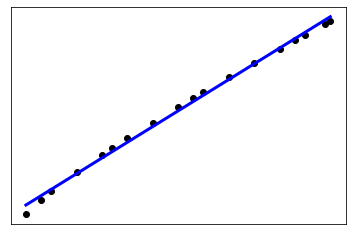

[[32 91 59 184]
 [122 150 28 23]
 [176 189 13 8]
 [296 288 -8 -3]
 [406 387 -19 -5]
 [448 426 -22 -5]
 [509 485 -24 -5]
 [608 584 -25 -4]
 [705 682 -23 -3]
 [761 741 -20 -3]
 [799 781 -18 -2]
 [892 879 -13 -1]
 [983 978 -5 -1]
 [1073 1076 4 0]
 [1126 1135 10 1]
 [1161 1175 14 1]
 [1230 1254 23 2]
 [1248 1273 26 2]]


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

x = np.array([0,300,500,1000,1500,1700,2000,2500,3000,3300,3500,4000,4500,5000,5300,5500,5900,6000], dtype='f')
y = np.array([32.0,122.4,176.0,296.4,405.7,447.6,509.0,608.4,704.7,761.4,799.0,891.9,983.0,1072.6,1125.7,1160.8,1230.3,1247.5])
x.resize(18,1)
y.resize(18,1)

#x=x[12:16]
#y=y[12:16]

regr = linear_model.LinearRegression()

regr.fit(x, y)

y_pred = regr.predict(x)

# The coefficients
print("Coefficients: \n", regr.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y, y_pred))

# Plot outputs
plt.scatter(x, y, color="black")
plt.plot(x, y_pred, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()
np.set_printoptions(formatter={'float': lambda x: "{0:0.0f}".format(x)})
print(np.hstack((y,y_pred,y_pred-y,(y_pred-y)*100/y)))

Mean squared error: 144989.28
Coefficient of determination: 0.02


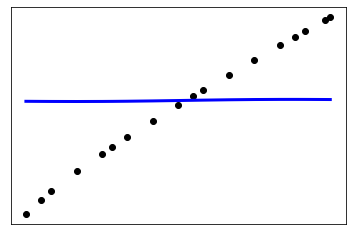

[[32 728 696 2174]
 [122 727 605 494]
 [176 727 551 313]
 [296 726 430 145]
 [406 727 321 79]
 [448 727 280 62]
 [509 728 219 43]
 [608 730 122 20]
 [705 732 28 4]
 [761 734 -28 -4]
 [799 735 -64 -8]
 [892 737 -155 -17]
 [983 738 -245 -25]
 [1073 739 -333 -31]
 [1126 739 -386 -34]
 [1161 739 -422 -36]
 [1230 739 -492 -40]
 [1248 738 -509 -41]]


In [ ]:
# SVM 1
from sklearn import svm
regr = svm.SVR()
regr.fit(x, y.reshape(18,))
y_pred=regr.predict(x).reshape(18,1)

# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y, y_pred))

# Plot outputs
plt.scatter(x, y, color="black")
plt.plot(x, y_pred, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()
np.set_printoptions(formatter={'float': lambda x: "{0:0.0f}".format(x)})
print(np.hstack((y,y_pred,y_pred-y,(y_pred-y)*100/y)))

Mean squared error: 144989.28
Coefficient of determination: 0.02


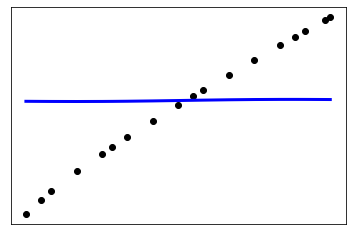

[[-2 32 728 696 2174]
 [-1 122 727 605 494]
 [-1 176 727 551 313]
 [-1 296 726 430 145]
 [-1 406 727 321 79]
 [-1 448 727 280 62]
 [-1 509 728 219 43]
 [-0 608 730 122 20]
 [-0 705 732 28 4]
 [0 761 734 -28 -4]
 [0 799 735 -64 -8]
 [0 892 737 -155 -17]
 [1 983 738 -245 -25]
 [1 1073 739 -333 -31]
 [1 1126 739 -386 -34]
 [1 1161 739 -422 -36]
 [1 1230 739 -492 -40]
 [1 1248 738 -509 -41]]


In [ ]:
# SVM 2
from sklearn import svm
regr = svm.SVR()

from sklearn import preprocessing
std_scaler = preprocessing.StandardScaler()
x_standard = std_scaler.fit_transform(x)
std_scaler.transform(x)

regr.fit(x, y.reshape(18,))
y_pred=regr.predict(x).reshape(18,1)

# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y, y_pred))

# Plot outputs
plt.scatter(x, y, color="black")
plt.plot(x, y_pred, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()
np.set_printoptions(formatter={'float': lambda x: "{0:0.0f}".format(x)})
print(np.hstack((x,y,y_pred,y_pred-y,(y_pred-y)*100/y)))


Mean squared error: 286.57
Coefficient of determination: 1.00


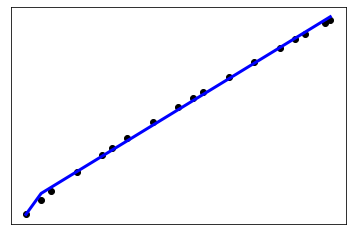

[[0 32 32 -0 -0]
 [300 122 163 41 33]
 [500 176 202 26 15]
 [1000 296 299 3 1]
 [1500 406 396 -10 -2]
 [1700 448 435 -13 -3]
 [2000 509 493 -16 -3]
 [2500 608 590 -19 -3]
 [3000 705 686 -18 -3]
 [3300 761 745 -17 -2]
 [3500 799 783 -16 -2]
 [4000 892 880 -12 -1]
 [4500 983 977 -6 -1]
 [5000 1073 1074 1 0]
 [5300 1126 1132 6 1]
 [5500 1161 1171 10 1]
 [5900 1230 1248 18 1]
 [6000 1248 1268 20 2]]


In [ ]:
#MLP
x = np.array([0,300,500,1000,1500,1700,2000,2500,3000,3300,3500,4000,4500,5000,5300,5500,5900,6000], dtype='f')
y = np.array([32.0,122.4,176.0,296.4,405.7,447.6,509.0,608.4,704.7,761.4,799.0,891.9,983.0,1072.6,1125.7,1160.8,1230.3,1247.5])
x.resize(18,1)
y.resize(18,1)

from sklearn.neural_network import MLPRegressor
reg = MLPRegressor(solver='lbfgs', alpha=1e-5,
                     hidden_layer_sizes=(5, 2), random_state=1)

reg.fit(x, y.reshape(18,))

y_pred=reg.predict(x).reshape(18,1)

# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y, y_pred))

# Plot outputs
plt.scatter(x, y, color="black")
plt.plot(x, y_pred, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()
np.set_printoptions(formatter={'float': lambda x: "{0:0.0f}".format(x)})
print(np.hstack((x,y,y_pred,y_pred-y,(y_pred-y)*100/y)))


Mean squared error: 3.07
Coefficient of determination: 1.00


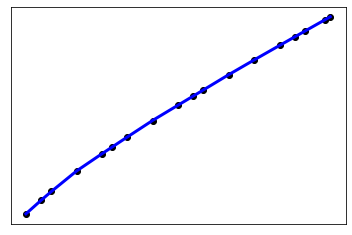

[[-2 32 36 4 11]
 [-1 122 119 -3 -3]
 [-1 176 173 -3 -2]
 [-1 296 300 3 1]
 [-1 406 406 -0 -0]
 [-1 448 447 -1 -0]
 [-1 509 509 -0 -0]
 [-0 608 611 2 0]
 [-0 705 705 -0 -0]
 [0 761 761 -1 -0]
 [0 799 798 -1 -0]
 [0 892 893 1 0]
 [1 983 983 -0 -0]
 [1 1073 1072 -1 -0]
 [1 1126 1125 -1 -0]
 [1 1161 1160 -1 -0]
 [1 1230 1231 1 0]
 [1 1248 1249 1 0]]


In [ ]:
# MLP with Scaler
x = np.array([0,300,500,1000,1500,1700,2000,2500,3000,3300,3500,4000,4500,5000,5300,5500,5900,6000], dtype='f')
y = np.array([32.0,122.4,176.0,296.4,405.7,447.6,509.0,608.4,704.7,761.4,799.0,891.9,983.0,1072.6,1125.7,1160.8,1230.3,1247.5])
x.resize(18,1)
y.resize(18,1)

from sklearn import preprocessing
std_scaler = preprocessing.StandardScaler()
x_standard = std_scaler.fit_transform(x)
x=std_scaler.transform(x)

from sklearn.neural_network import MLPRegressor
reg = MLPRegressor(solver='lbfgs', alpha=1e-5,
                     hidden_layer_sizes=(5, 2), random_state=1)

reg.fit(x, y.reshape(18,))

y_pred=reg.predict(x).reshape(18,1)

# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y, y_pred))

# Plot outputs
plt.scatter(x, y, color="black")
plt.plot(x, y_pred, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()
np.set_printoptions(formatter={'float': lambda x: "{0:0.0f}".format(x)})
print(np.hstack((x,y,y_pred,y_pred-y,(y_pred-y)*100/y)))


Mean squared error: 0.08
Coefficient of determination: 1.00


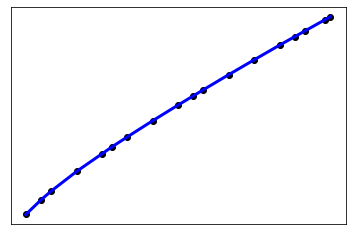

[[-1.58 32.00 32.00 -0.00 -0.01]
 [-1.43 122.40 122.42 0.02 0.02]
 [-1.33 176.00 175.99 -0.01 -0.01]
 [-1.07 296.40 296.63 0.23 0.08]
 [-0.81 405.70 404.90 -0.80 -0.20]
 [-0.71 447.60 448.16 0.56 0.12]
 [-0.56 509.00 509.01 0.01 0.00]
 [-0.30 608.40 608.39 -0.01 -0.00]
 [-0.04 704.70 704.75 0.05 0.01]
 [0.11 761.40 761.32 -0.08 -0.01]
 [0.21 799.00 799.03 0.03 0.00]
 [0.47 891.90 891.91 0.01 0.00]
 [0.73 983.00 982.99 -0.01 -0.00]
 [0.99 1072.60 1073.00 0.40 0.04]
 [1.14 1125.70 1125.44 -0.26 -0.02]
 [1.24 1160.80 1160.40 -0.40 -0.03]
 [1.45 1230.30 1230.30 0.00 0.00]
 [1.50 1247.50 1247.78 0.28 0.02]]


In [ ]:
# MLP with Scaler 100,50 neurons
x = np.array([0,300,500,1000,1500,1700,2000,2500,3000,3300,3500,4000,4500,5000,5300,5500,5900,6000], dtype='f')
y = np.array([32.0,122.4,176.0,296.4,405.7,447.6,509.0,608.4,704.7,761.4,799.0,891.9,983.0,1072.6,1125.7,1160.8,1230.3,1247.5])
x.resize(18,1)
y.resize(18,1)

from sklearn import preprocessing
std_scaler = preprocessing.StandardScaler()
x_standard = std_scaler.fit_transform(x)
x=std_scaler.transform(x)

from sklearn.neural_network import MLPRegressor
reg = MLPRegressor(solver='lbfgs', alpha=1e-5, max_iter=10000,
                     hidden_layer_sizes=(40, 40), random_state=1)
#reg = MLPRegressor(solver='adam', alpha=1e-5, activation='relu', max_iter=10000,
#                     hidden_layer_sizes=(40, 40), random_state=1)
# Hyperparameters....
# layer_sizes activation MSE
# 5,3     relu 8.77
# 7,4     relu 590.76
# 8,4     relu 15000
# 10,4    relu 43
# 20,20   relu 2.87
# 40,40   relu 0.8 max_iter=200
# 40,40   relu 0.08 max_iter=10000
# 40,40   identity Takes us back to LinearRegression!!
# 40,40   logistic No converge zig-zag prediction
# 20,20   logistic No converge WORSE zig-zag prediction
# 40,40 adam relu 10000 MSE=10.... and so on!

reg.fit(x, y.reshape(18,))

y_pred=reg.predict(x).reshape(18,1)

# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y, y_pred))

# Plot outputs
plt.scatter(x, y, color="black")
plt.plot(x, y_pred, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()
np.set_printoptions(formatter={'float': lambda x: "{0:0.2f}".format(x)})
print(np.hstack((x,y,y_pred,y_pred-y,(y_pred-y)*100/y)))



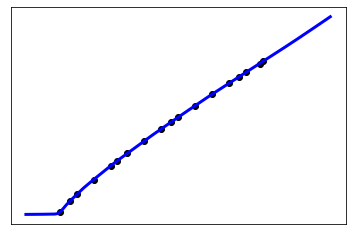

In [ ]:
# Extrapolate
x2 = np.arange(-1000, 8000, 10, dtype=float).reshape(-1,1)
#print(x)
x2=std_scaler.transform(x2)
np.set_printoptions(formatter={'float': lambda x: "{0:0.4f}".format(x)})
#print(x)

#print(x.dtype)

y_pred=reg.predict(x2).reshape(-1,1)

# Plot outputs
plt.scatter(x, y, color="black")
plt.plot(x2, y_pred, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()
#np.set_printoptions(formatter={'float': lambda x: "{0:0.0f}".format(x)})
#print(np.hstack((x,y,y_pred,y_pred-y,(y_pred-y)*100/y)))
